# Analysis for the Individual Decision Task

## Imports

In [1]:
import pandas as pd
from analysis_utils import (summary_statistics_individual,
                            response_times,
                            calculate_pmf,
                            plot_pmf_by_combinations_individual_task,
                            plot_pmf_by_combinations_individual_task_reversed,
                            perform_chi_squared_tests_for_pairs,
                            gen_epps_singleton_individual,
                            gen_one_sample_chi_squared_individual)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Data Reading

In [2]:
individual_df = pd.read_csv('/Users/aaronberman/Desktop/Altruism & Lying Aversion/data/additional_baseline/all_additional_treatments_dropbox_df.csv', index_col=0)

## Constants

In [3]:
combinations = [
    ('Chapman', 'Deterministic'),
    ('Chapman', 'Stochastic'),
    ('Wuhan', 'Deterministic'),
    ('Wuhan', 'Stochastic'),
]

In [4]:
# Create a new column that combines the 'Location', 'Treatment', and 'Partner' into a single group identifier
individual_df['Group'] = individual_df['Location'] + ', ' + individual_df['Treatment'] 

## Summary Statistics

### Chapman

In [5]:
summary_statistics_individual(individual_df, 'Chapman')

Gender counts among Chapman participants:
 Female    78
Male      33
Other      1
Name: gender, dtype: int64

Nationality counts among Chapman participants:
 American    95
Other       14
Chinese      3
Name: nationality, dtype: int64

Treatment counts among Chapman participants:
 Stochastic       57
Deterministic    55
Name: Treatment, dtype: int64
\Decision counts among Chapman participants:
 5    71
4    22
3    11
2     6
1     2
Name: decision, dtype: int64


In [6]:
response_times(individual_df, 'Chapman')

Mean Duration (in seconds): 735.7410714285714
Standard Deviation of Duration (in seconds): 5777.010107243955
Median Duration (in seconds): 155.0


### Wuhan

In [7]:
summary_statistics_individual(individual_df, 'Wuhan')

Gender counts among Wuhan participants:
 Female               60
Male                 38
Prefer not to say     1
Name: gender, dtype: int64

Nationality counts among Wuhan participants:
 Chinese    99
Name: nationality, dtype: int64

Treatment counts among Wuhan participants:
 Deterministic    52
Stochastic       48
Name: Treatment, dtype: int64
\Decision counts among Wuhan participants:
 5    60
4    21
3    14
1     3
2     2
Name: decision, dtype: int64


In [8]:
response_times(individual_df, 'Wuhan')

Mean Duration (in seconds): 804.58
Standard Deviation of Duration (in seconds): 2723.173995487061
Median Duration (in seconds): 248.5


## PMFs

In [9]:
# Iterate through combinations, calculate, and print PMFs
for location, treatment, in combinations:
    subset_df = individual_df[(individual_df['Location'] == location) & 
                   (individual_df['Treatment'] == treatment)]
    pmf = calculate_pmf(subset_df, 'decision')
    
    print(f"\nPMF for Location == {location}, Treatment == {treatment}\n", pmf)


PMF for Location == Chapman, Treatment == Deterministic
 2    0.018182
3    0.072727
4    0.181818
5    0.727273
Name: decision, dtype: float64

PMF for Location == Chapman, Treatment == Stochastic
 1    0.035088
2    0.087719
3    0.122807
4    0.210526
5    0.543860
Name: decision, dtype: float64

PMF for Location == Wuhan, Treatment == Deterministic
 2    0.019231
3    0.076923
4    0.173077
5    0.730769
Name: decision, dtype: float64

PMF for Location == Wuhan, Treatment == Stochastic
 1    0.062500
2    0.020833
3    0.208333
4    0.250000
5    0.458333
Name: decision, dtype: float64


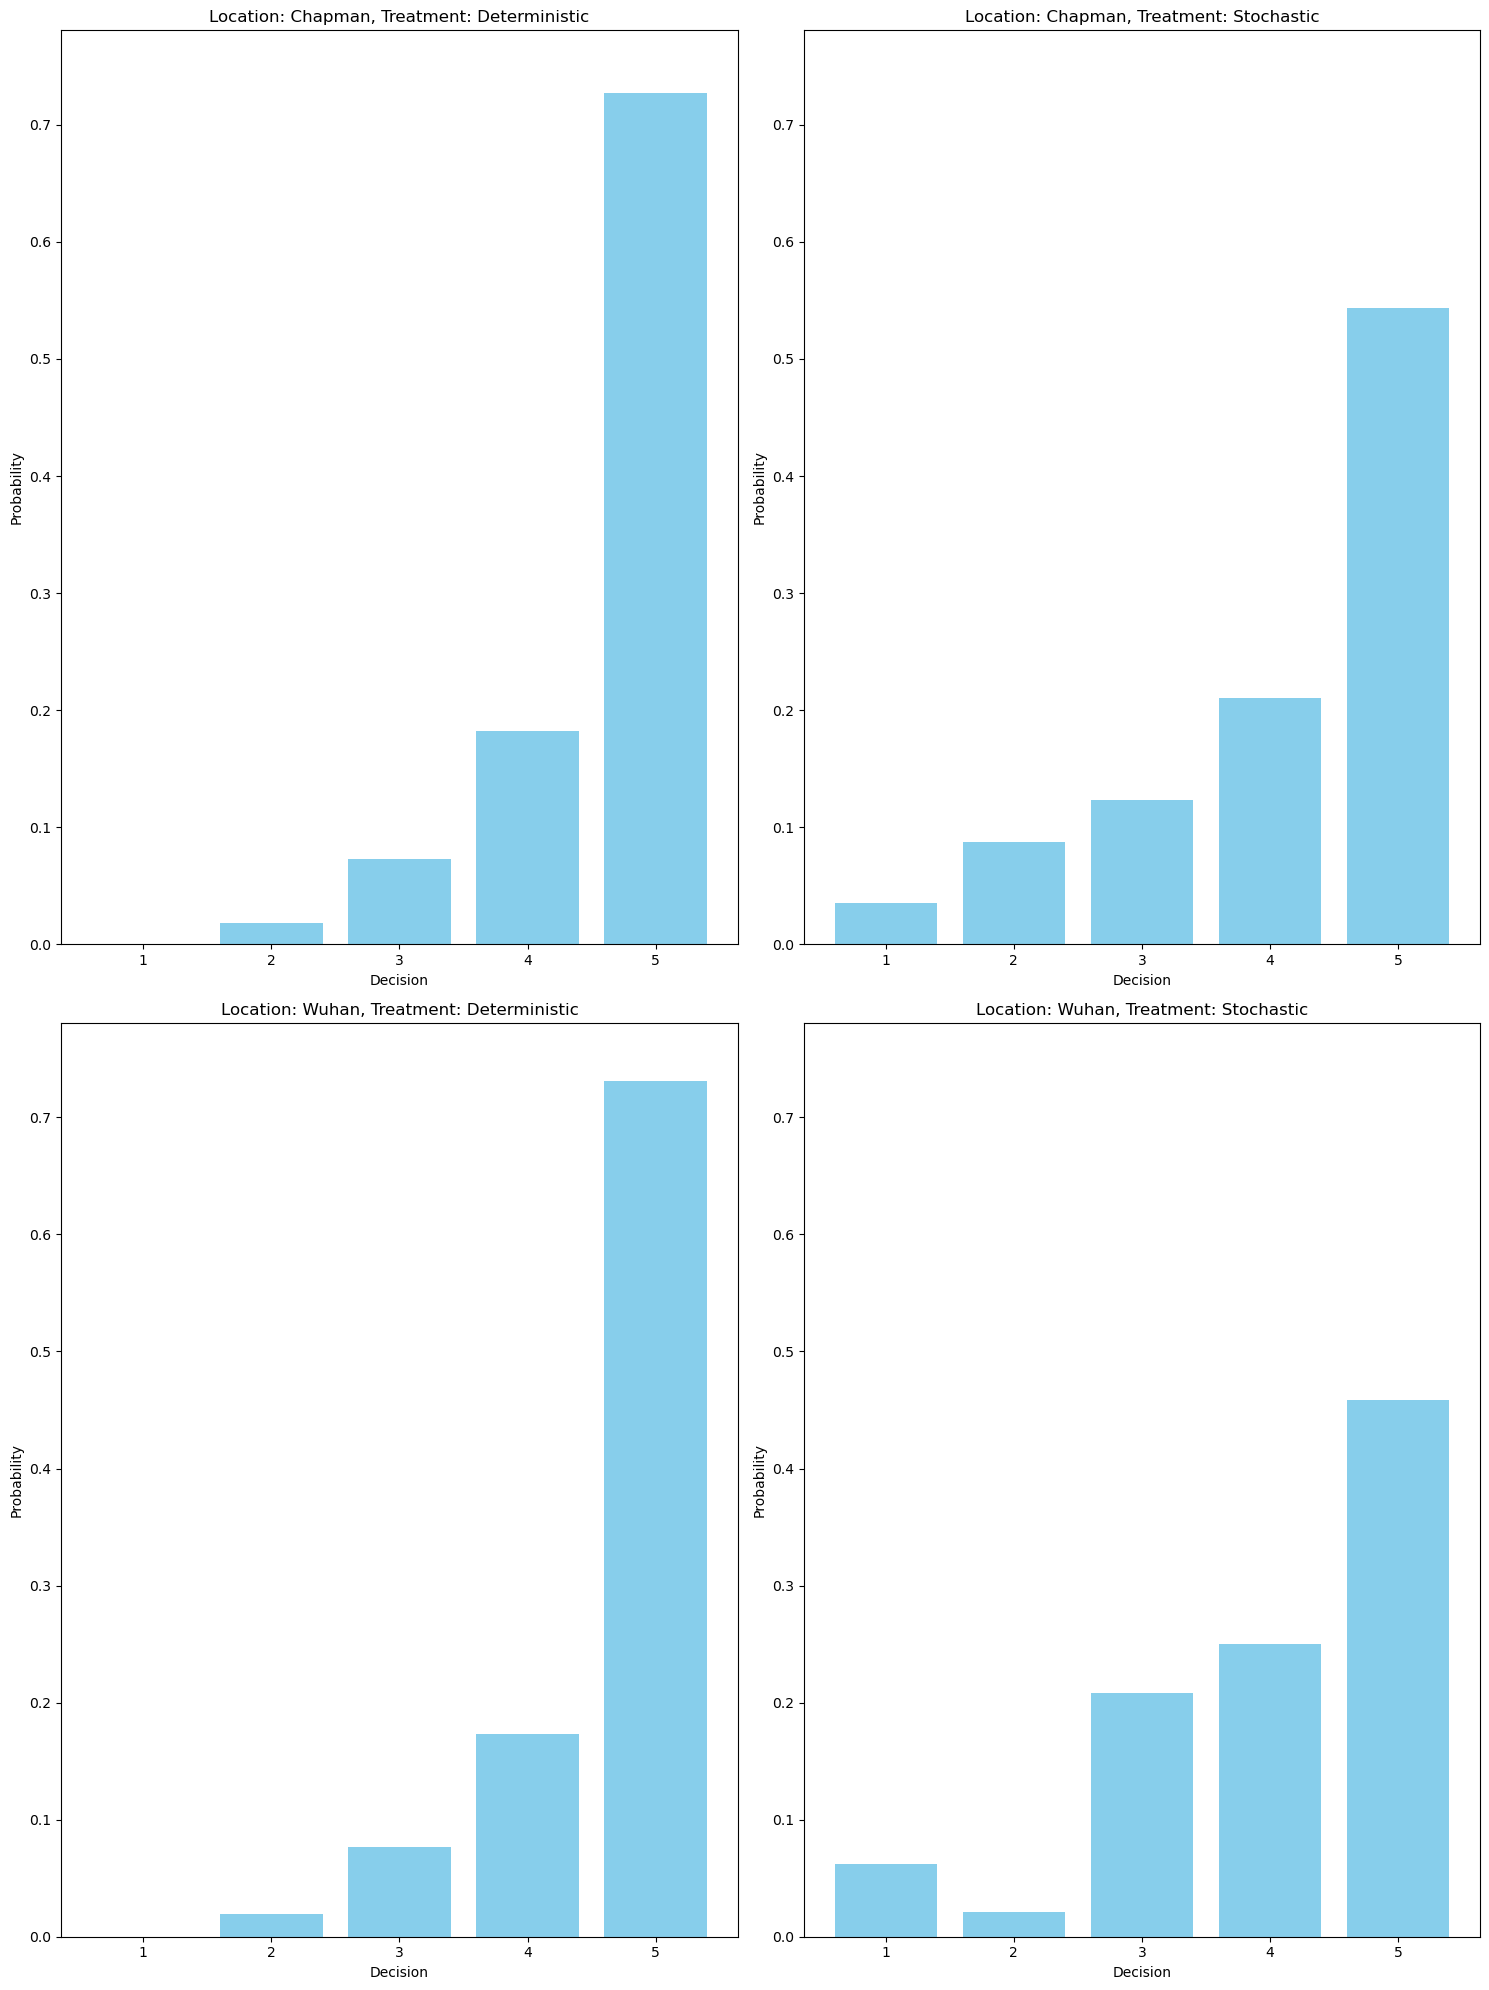

In [10]:
plot_pmf_by_combinations_individual_task(individual_df, combinations)

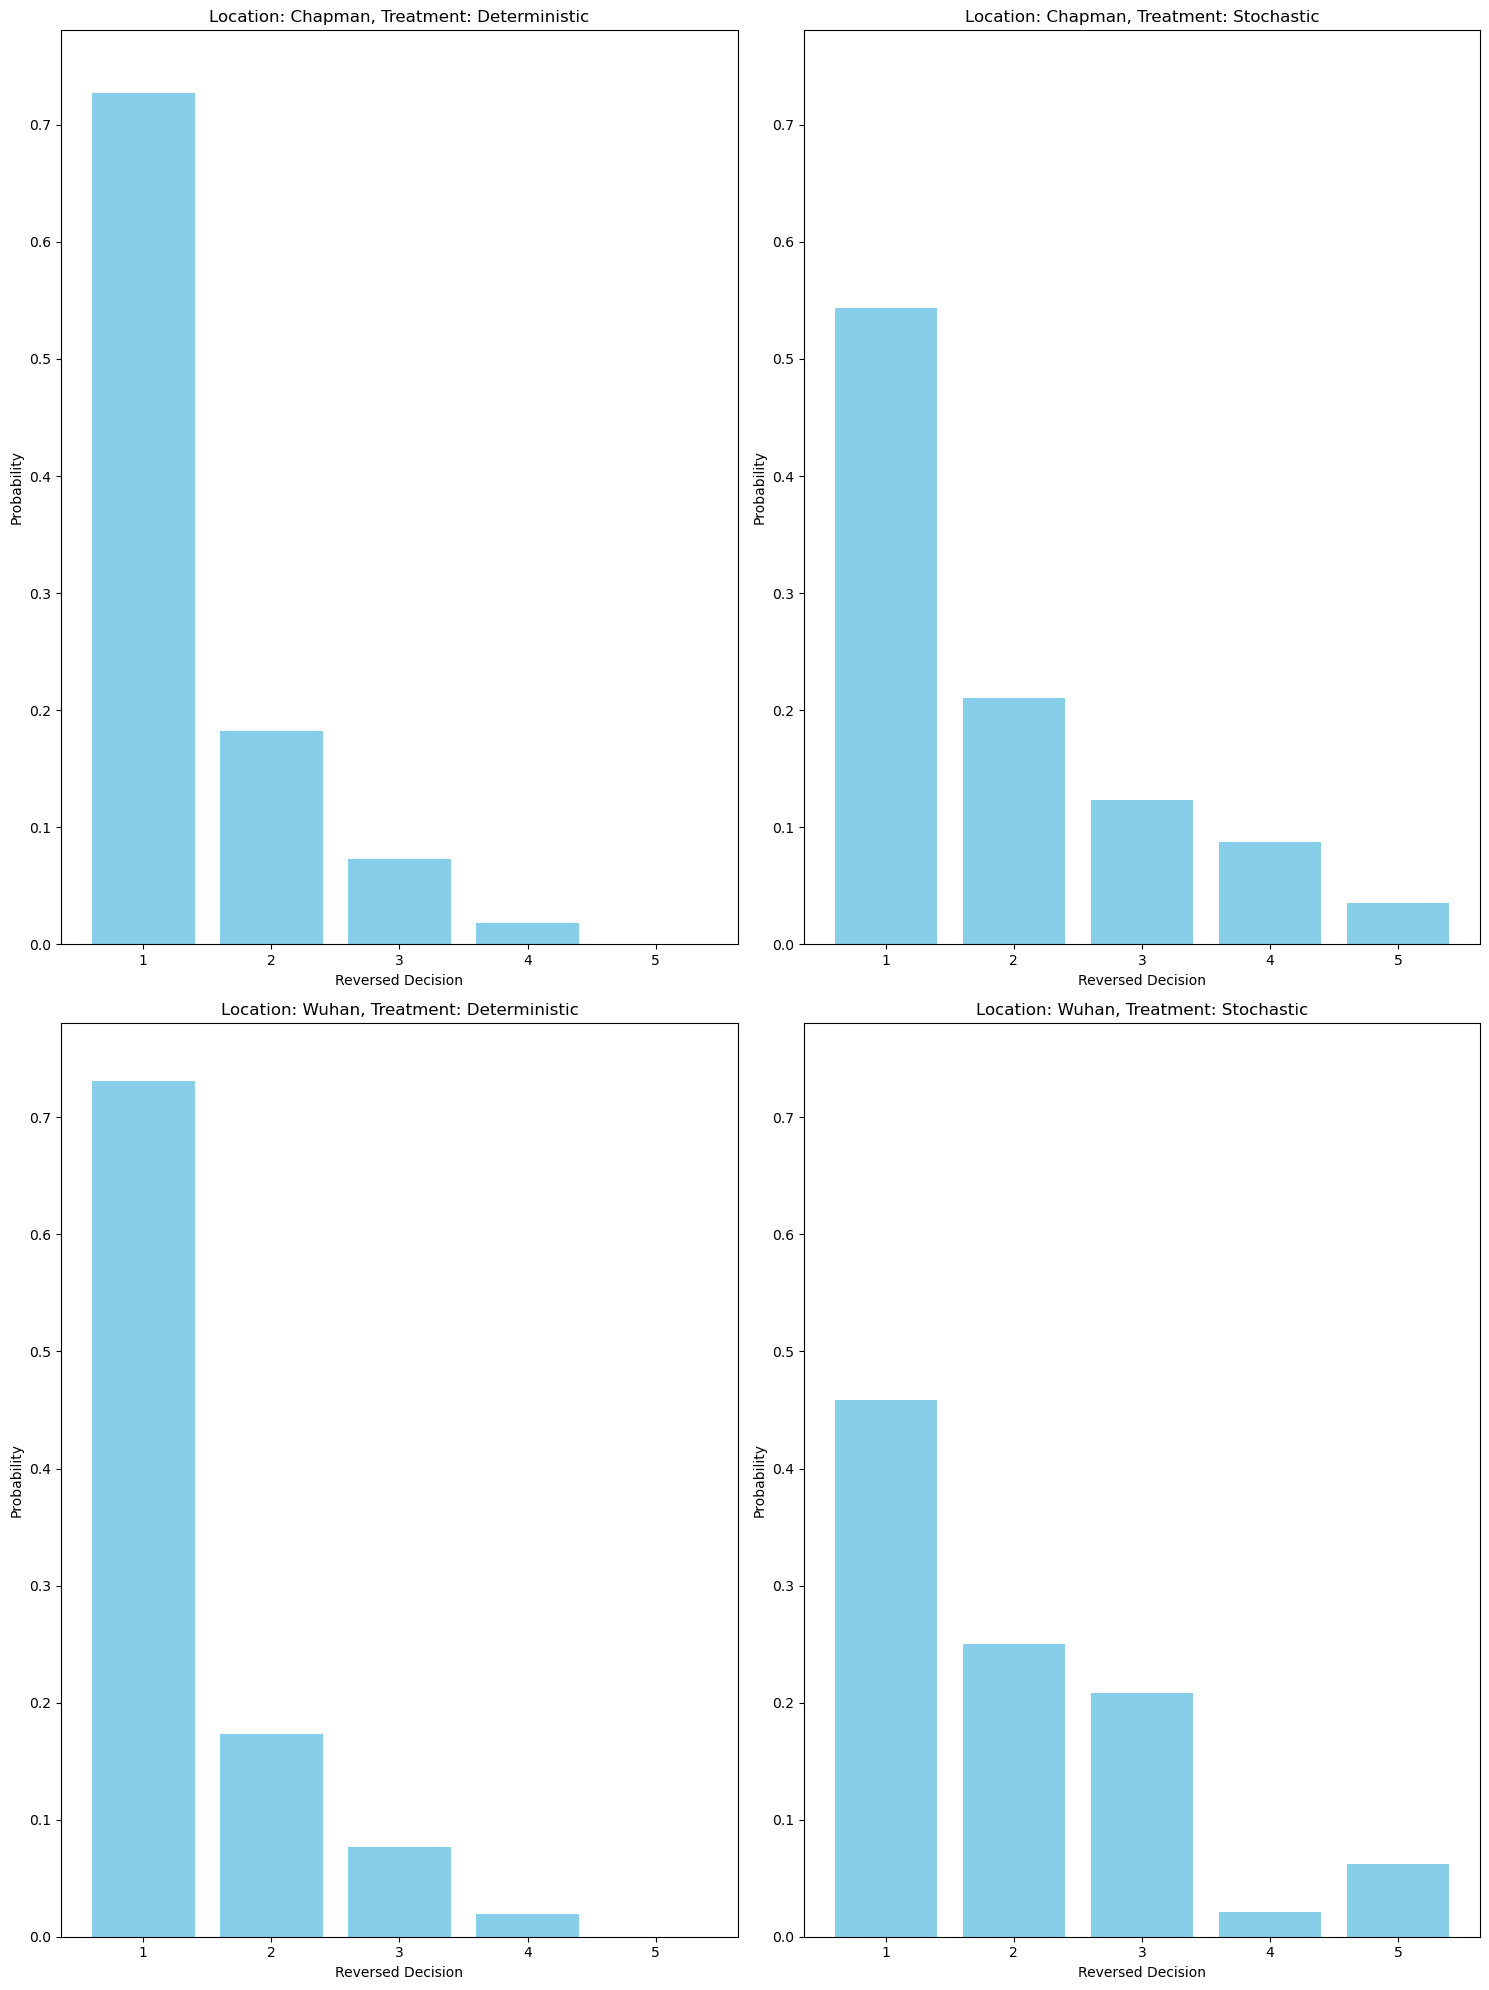

In [11]:
plot_pmf_by_combinations_individual_task_reversed(individual_df, combinations)

## Statistical Tests

### Distributional

#### Chi-Squared

In [12]:
results = perform_chi_squared_tests_for_pairs(individual_df, 'Group')
for result in results:
    print(result)

{'Treatment Pair': 'Chapman, Deterministic vs Chapman, Stochastic', 'Chi2 Statistic': 6.77395751435781, 'P-value': 0.14832670420625776}
{'Treatment Pair': 'Chapman, Deterministic vs Wuhan, Stochastic', 'Chi2 Statistic': 10.55206206916251, 'P-value': 0.032087354901427736}
{'Treatment Pair': 'Chapman, Deterministic vs Wuhan, Deterministic', 'Chi2 Statistic': 0.01981705878467012, 'P-value': 0.999262440376773}
{'Treatment Pair': 'Chapman, Stochastic vs Wuhan, Stochastic', 'Chi2 Statistic': 4.183689054072472, 'P-value': 0.3817166574941492}
{'Treatment Pair': 'Chapman, Stochastic vs Wuhan, Deterministic', 'Chi2 Statistic': 6.407690104200402, 'P-value': 0.17070037420247258}
{'Treatment Pair': 'Wuhan, Stochastic vs Wuhan, Deterministic', 'Chi2 Statistic': 10.122863247863249, 'P-value': 0.03840814969836484}


In [13]:
# 3-point distributions
three_point_individual_df = individual_df[individual_df['decision'].isin([3, 4, 5])]
results = perform_chi_squared_tests_for_pairs(three_point_individual_df, 'Group')
for result in results:
    print(result)

{'Treatment Pair': 'Chapman, Deterministic vs Chapman, Stochastic', 'Chi2 Statistic': 1.9899426186750142, 'P-value': 0.3697340523067933}
{'Treatment Pair': 'Chapman, Deterministic vs Wuhan, Stochastic', 'Chi2 Statistic': 7.0318631081094445, 'P-value': 0.029720104171096454}
{'Treatment Pair': 'Chapman, Deterministic vs Wuhan, Deterministic', 'Chi2 Statistic': 0.018214213260652787, 'P-value': 0.9909342374617165}
{'Treatment Pair': 'Chapman, Stochastic vs Wuhan, Stochastic', 'Chi2 Statistic': 1.6815861164362826, 'P-value': 0.43136828757503176}
{'Treatment Pair': 'Chapman, Stochastic vs Wuhan, Deterministic', 'Chi2 Statistic': 1.9471880662673495, 'P-value': 0.37772304649541716}
{'Treatment Pair': 'Wuhan, Stochastic vs Wuhan, Deterministic', 'Chi2 Statistic': 6.7877302436125975, 'P-value': 0.03357864022310988}


#### Epps-Singleton

In [5]:
# Chapman | Deterministic vs Stochastic
gen_epps_singleton_individual(individual_df,
                              'Chapman', 'Deterministic',
                              'Chapman', 'Stochastic')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 7.356774233648693, P-value: 0.1181933188816434


In [6]:
# Wuhan | Deterministic vs Stochastic
gen_epps_singleton_individual(individual_df,
                              'Wuhan', 'Deterministic',
                              'Wuhan', 'Stochastic')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 10.875072302721337, P-value: 0.02800449433729857


In [7]:
# Deterministic | Chapman vs Wuhan
gen_epps_singleton_individual(individual_df,
                              'Chapman', 'Deterministic',
                              'Wuhan', 'Deterministic')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 0.01982420832057621, P-value: 0.9992620427801501


/Users/aaronberman/opt/anaconda3/envs/MGPGG_DA/lib/python3.9/site-packages/scipy/stats/_hypotests.py:131: UserWarning: Estimated covariance matrix does not have full rank. This indicates a bad choice of the input t and the test might not be consistent.
  warnings.warn('Estimated covariance matrix does not have full rank. '


In [8]:
# Stochastic | Chapman vs Wuhan
gen_epps_singleton_individual(individual_df,
                              'Chapman', 'Stochastic',
                              'Wuhan', 'Stochastic')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 4.531289713435836, P-value: 0.33885343588689115


In [9]:
# Chapman Deterministic versus Wuhan Stochastic
gen_epps_singleton_individual(individual_df,
                              'Chapman', 'Deterministic',
                              'Wuhan', 'Stochastic')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 11.049378288266052, P-value: 0.026014639732072187
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
# Chapman Stochastic versus Wuhan Deterministic
gen_epps_singleton_individual(individual_df,
                              'Chapman', 'Stochastic',
                              'Wuhan', 'Deterministic')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Epps-Singleton Test Statistic: 7.158332030515908, P-value: 0.12775395053145247


#### One-Sample

##### Chi-Squared

In [5]:
gen_one_sample_chi_squared_individual(individual_df, 'Stochastic', [1, 2, 3, 4, 5])

{'Group': 'Chapman', 'Chi2 Statistic': 46.77192982456141, 'P-value': 1.7011571278480278e-09}
{'Group': 'Wuhan', 'Chi2 Statistic': 28.875000000000004, 'P-value': 8.28801232290047e-06}


In [6]:
gen_one_sample_chi_squared_individual(individual_df, 'Stochastic', [3, 4, 5])

{'Group': 'Chapman', 'Chi2 Statistic': 19.24, 'P-value': 6.638761765307788e-05}
{'Group': 'Wuhan', 'Chi2 Statistic': 5.636363636363637, 'P-value': 0.05971441573218527}
